In [1]:
from src.models.patch_mlp import PatchMLPModel, Game
from src.player import *
from src.utils import pyplot_game
import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(device)
model = PatchMLPModel.load('weights/patch_mlp_7x7_512_halving_mr.pth', device)
player = ThresholdPlayer(model, 0.01, 0.95)

cpu


In [7]:
# 9 = closed cledd, 10 = flag
g = np.array([[
    [9,9,9,9,9,9,9,9,9],
    [9,10,4,2,2,9,9,1,9],
    [10,10,2,1,10,2,1,2,9],
    [2,2,1,2,2,2,0,2,9],
    [0,1,1,2,10,1,1,3,9],
    [0,1,10,2,1,2,3,10,9],
    [0,1,1,1,0,1,10,10,9],
]])

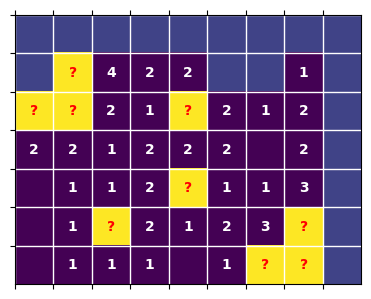

In [8]:
ax, s, h = pyplot_game(g[0], print_zeros=False)

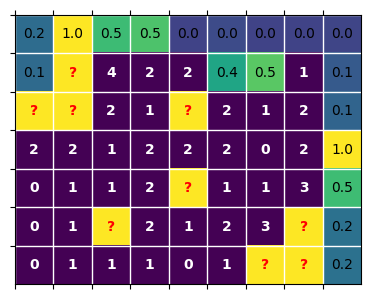

(<Axes: >, <matplotlib.image.AxesImage at 0x19dd7460290>, None)

In [9]:
p = model(g, np.array([12]))
pyplot_game(g[0], mine_probs=p[0])

In [13]:
g = Game(16, 30, 99, n=1)
g.open_zero()

[ True]
[False]


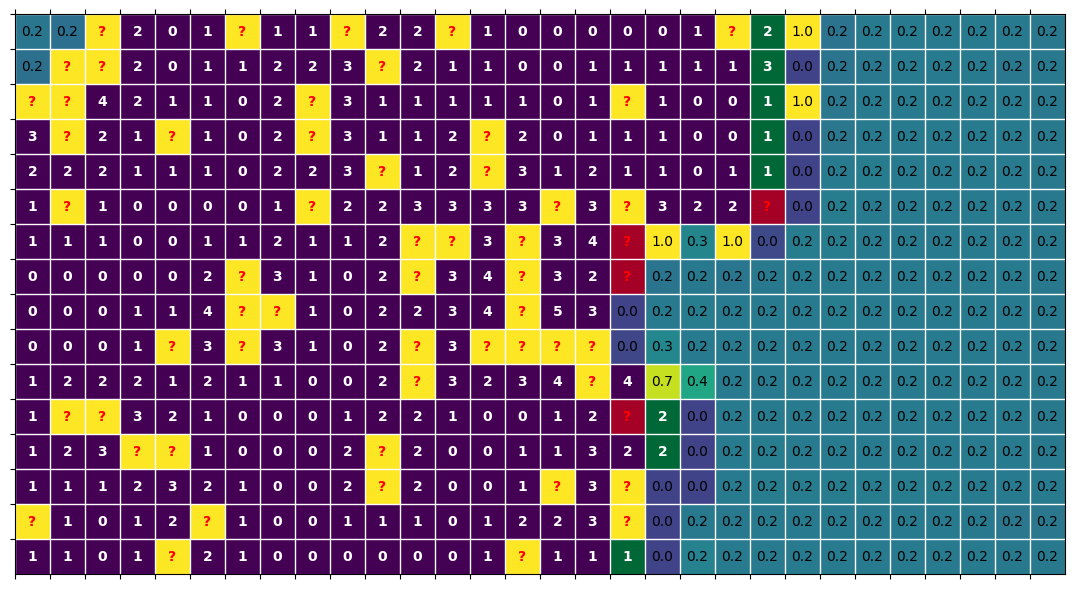

(<Axes: >,
 <matplotlib.image.AxesImage at 0x1b1526da810>)

In [14]:
o, f = player.step(g)
print(g.active_games)
print(g.won)
p = model(g.game_state(), g.mines_n)
g.pyplot_game(0, mine_probs=p[0], highlighted='last_moves', print_zeros= True, size=0.35) # highlight newly opened in red

[False]
[False]
[0.71653543]


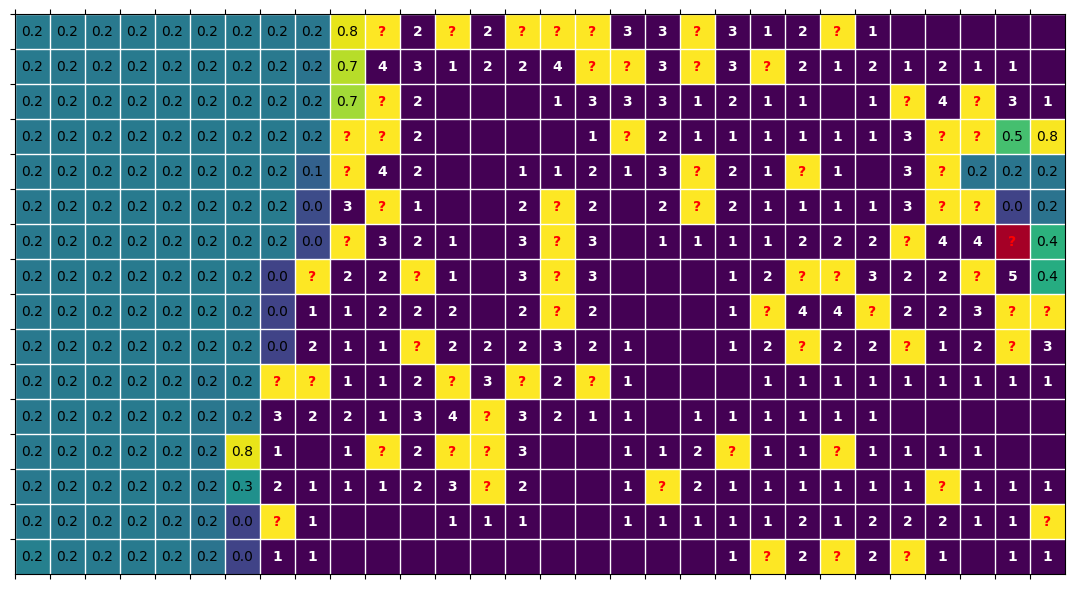

(<Axes: >,
 <matplotlib.image.AxesImage at 0x29392a355e0>)

In [7]:
player.play(g) # play untill the end
print(g.active_games)
print(g.won)
print(g.scores())
p = model(g.game_state(), g.mines_n)
g.pyplot_game(0, mine_probs=p[0], highlighted='losing', print_zeros=False)

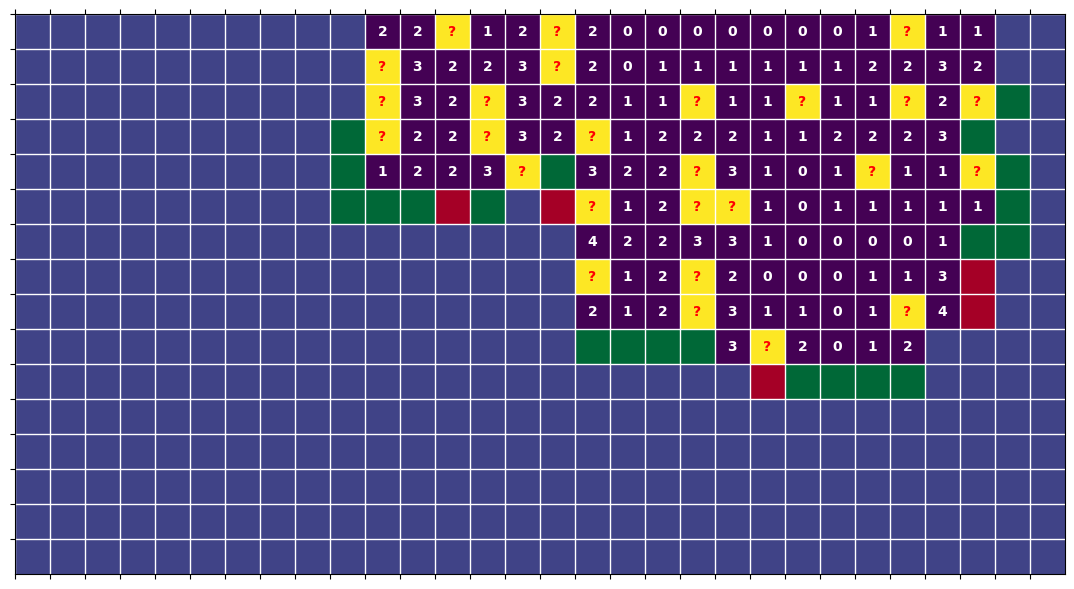

In [6]:
g = Game(16, 30, 99, 1)
g.open_zero()
player.play(g, 10)
player.plot_moves(g)

In [3]:
games = Game(16, 30, 99, 500)
games.open_zero()
player.play(games)
print(f'average score: {np.average(games.scores(final_only=True))}')
print(f'win rate: {games.win_rate()}')

average score: 0.6018792650918635
win rate: 0.194


MovieWriter ffmpeg unavailable; using Pillow instead.


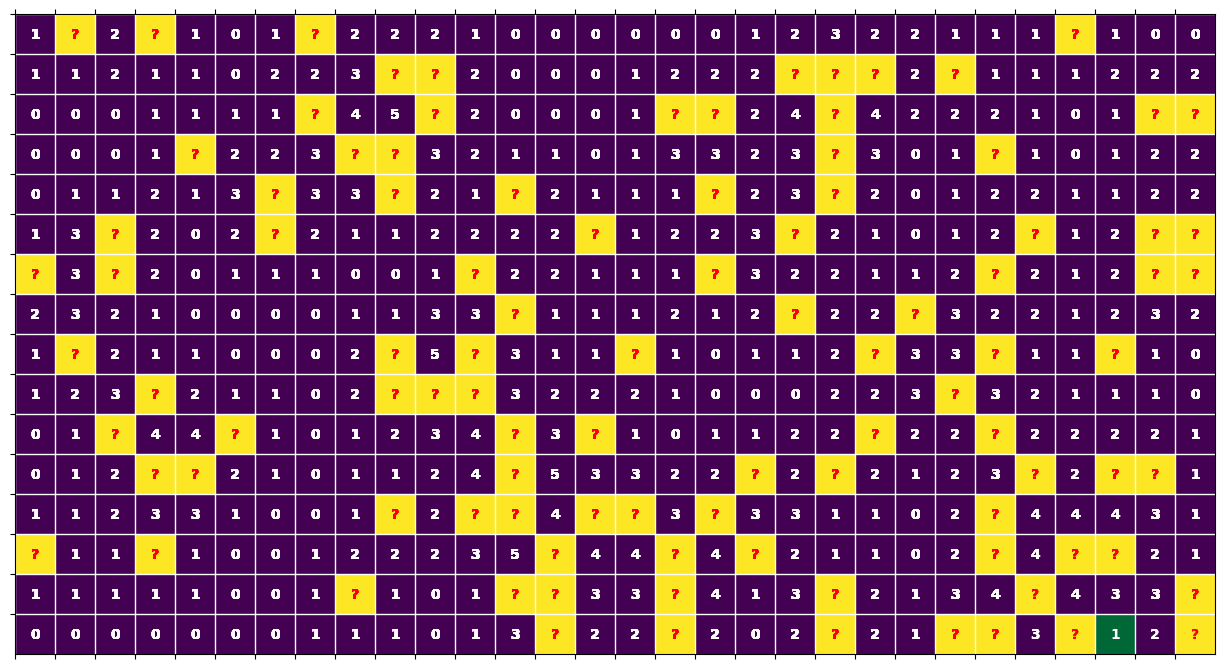

In [4]:
#%matplotlib widget
g = Game(16, 30, 99, n=1)
animation = GameAnimation(g, player)
# plt.show()
# animation.animation.save('animation.gif')